In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os, sys

In [2]:
def gompertz(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    return p

In [3]:
def simple_gompertz_rates(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    rate = p*(b*np.exp(a-b*t))

    #rate = rate_1*np.exp(-d*t) - d*p*np.exp(-d*t)

    return rate

In [4]:
def d_simple_gompertz_rates(t,k,a,b):
    p = k*np.exp(-np.exp(a-b*t))

    rate_1 = -(b**2)*p*np.exp(a-b*t)

    rate_2 = (b**2)*p*np.exp(a-b*t)*np.exp(a-b*t)

    rate_rate = rate_1 + rate_2 #+  d_gompertz_rates(t,k,a,b)

    return rate_rate

In [6]:
t = np.linspace(1,100,1000)

k, a = 1, 2.0
b = [0.05,0.1,0.2]

#k, b = 1, 0.1
#a = [2.0,3.0,4.0]

N = {}
dN = {}
d2N = {}

T1 = np.zeros(shape=(len(b),))
T2 = np.zeros(shape=(len(b),))

for i in range(0,len(b)):
    N[i] = gompertz(t,k,a,b[i])
    dN[i] = simple_gompertz_rates(t,k,a,b[i])
    d2N[i] = d_simple_gompertz_rates(t,k,a,b[i])
    
    T2[i] = np.argmax(dN)
    T1[i] = np.argmax(d2N)
"""
    
for i in range(0,len(a)):
    N[i] = gompertz(t,k,a[i],b)
    dN[i] = simple_gompertz_rates(t,k,a[i],b)
    d2N[i] = d_simple_gompertz_rates(t,k,a[i],b)
    
"""

'\n    \nfor i in range(0,len(a)):\n    N[i] = gompertz(t,k,a[i],b)\n    dN[i] = simple_gompertz_rates(t,k,a[i],b)\n    d2N[i] = d_simple_gompertz_rates(t,k,a[i],b)\n    \n'

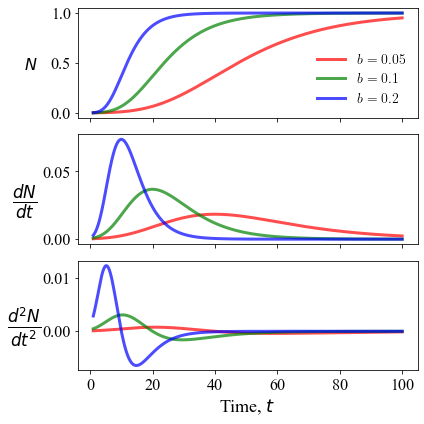

In [7]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1,figsize=(6,6),sharex='all')

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

plt.rc('text', usetex=True)

ax0.plot(t,N[0],color='r',linewidth=3,alpha=0.7,label=r'$b=0.05$')
ax0.plot(t,N[1],color='g',linewidth=3,alpha=0.7,label=r'$b=0.1$')
ax0.plot(t,N[2],color='b',linewidth=3,alpha=0.7,label=r'$b=0.2$')
ax0.set_ylabel(r"$N$",size=16,rotation=0,labelpad=20,position=(1,0.4))
ax0.tick_params(labelsize=16)
ax0.legend(frameon=False,prop={'size': 14})

ax1.plot(t,dN[0],color='r',linewidth=3,alpha=0.7)
ax1.plot(t,dN[1],color='g',linewidth=3,alpha=0.7)
ax1.plot(t,dN[2],color='b',linewidth=3,alpha=0.7)
ax1.set_ylabel(r"$\frac{dN}{dt}$",size=24,rotation=0,labelpad=18,position=(1,0.2))
ax1.tick_params(labelsize=16)

ax2.plot(t,d2N[0],color='r',linewidth=3,alpha=0.7)
ax2.plot(t,d2N[1],color='g',linewidth=3,alpha=0.7)
ax2.plot(t,d2N[2],color='b',linewidth=3,alpha=0.7)
ax2.set_ylabel(r"$\frac{d^{2}N}{dt^{2}}$",size=24,rotation=0,labelpad=18,position=(1,0.2))
ax2.set_xlabel(r"Time, $t$",size=18)
ax2.tick_params(labelsize=16)

plt.tight_layout()

#plt.savefig('gompertz-demo.png',dpi=600)